In [1]:
#Load the dataset
from keras.datasets.mnist import load_data
(xtrain,ytrain),(xtest,ytest)=load_data()
print('Train Shape:\t',xtrain.shape,ytrain.shape)
print()
print('Test Shape:\t',xtest.shape,ytest.shape)


Train Shape:	 (60000, 28, 28) (60000,)

Test Shape:	 (10000, 28, 28) (10000,)


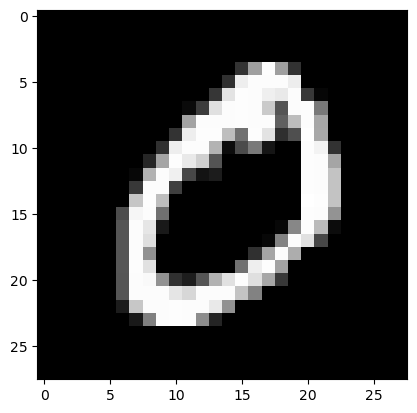

In [2]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[1],cmap='gray')

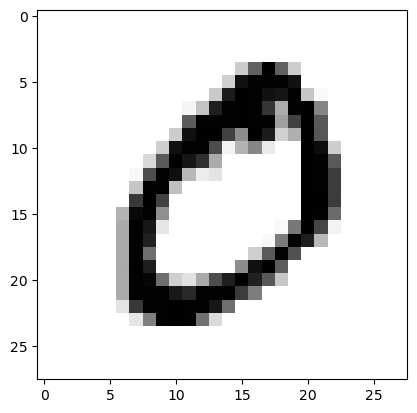

In [3]:
plt.imshow(xtrain[1],cmap='gray_r')

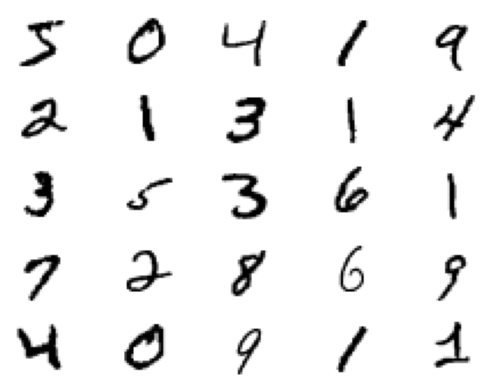

In [4]:
for i in range(25):
    plt.subplot(5,5,1+i)
    plt.axis('off')
    plt.imshow(xtrain[i],cmap='gray_r')
plt.show()


In [5]:
#Import all required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,Flatten,Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import plot_model


# Build Discriminator Model:
    inputs: 28 * 28 pixels in size
    Output: Binary classification(real/fake)

In [6]:
def discriminator(in_shape=(28,28,1)):
    model=Sequential()
    #1st conv layer
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
 
    #2nd conv layer
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
 
    #converting higher dimes into one dimen
    model.add(Flatten())
 
    #output layer
    model.add(Dense(1,activation='sigmoid'))
 
    #Compile model
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
 
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
 
    return model
model=discriminator()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

# Load & prepare the mnist training images

In [7]:
from numpy import expand_dims,ones,zeros
def load_real_samples():
    (xtrain,_),(_,_)=load_data()
    x=expand_dims(xtrain,axis=-1)
    x=x.astype('float32')
    x=x/255.
    return x


In [8]:
load_real_samples()

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [9]:
#select real images
from numpy.random import rand,randint
def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
    #generate 'real' class labels
    y=ones((n_samples,1))
    return x,y


In [10]:
generate_real_samples(load_real_samples(),n_samples=10)

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [11]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
    x=rand(28*28*n_samples)
 
    x=x.reshape(n_samples,28,28,1)
 
    #generate fake class labels
    y=zeros((n_samples,1))
 
    return x,y

In [12]:
generate_fake_samples(10)


(array([[[[0.39257882],
          [0.85811479],
          [0.60926992],
          ...,
          [0.22875685],
          [0.62244364],
          [0.20372307]],
 
         [[0.89663434],
          [0.74611007],
          [0.6086814 ],
          ...,
          [0.75712414],
          [0.66326486],
          [0.58424627]],
 
         [[0.18427057],
          [0.50800726],
          [0.89886972],
          ...,
          [0.78110356],
          [0.4621288 ],
          [0.0856918 ]],
 
         ...,
 
         [[0.96790695],
          [0.86924135],
          [0.26926316],
          ...,
          [0.50448533],
          [0.37844554],
          [0.67084472]],
 
         [[0.72114979],
          [0.56925409],
          [0.26817204],
          ...,
          [0.09780856],
          [0.04998577],
          [0.00138624]],
 
         [[0.9846726 ],
          [0.87910025],
          [0.61298698],
          ...,
          [0.75760071],
          [0.64972399],
          [0.679565  ]]],
 
 
        [

# Train the Discriminator model

In [13]:
def train_discriminator(model,dataset,n_iter=100,n_batch=256):
    half_batch=int(n_batch//22)
 
    for i in range(n_iter):
        #get randomly selected 'real' images
        xreal,yreal=generate_real_samples(dataset,half_batch)
 
        #update discriminator on real images
        _,real_acc=model.train_on_batch(xreal,yreal)
        #generate 'fake' images
        xfake,yfake=generate_fake_samples(half_batch)
 
        #update discriminator fake samples
 
        _,fake_acc=model.train_on_batch(xfake,yfake)
 
        #summarize performance
        print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))


In [14]:
#define the discriminator model
model=discriminator()
#load image data
dataset=load_real_samples()

# Train the model

In [15]:
train_discriminator(model,dataset)


>1 real=55% fake=36%
>2 real=82% fake=36%
>3 real=73% fake=18%
>4 real=55% fake=73%
>5 real=55% fake=73%
>6 real=73% fake=73%
>7 real=55% fake=100%
>8 real=64% fake=82%
>9 real=73% fake=100%
>10 real=73% fake=100%
>11 real=45% fake=100%
>12 real=27% fake=100%
>13 real=73% fake=100%
>14 real=55% fake=100%
>15 real=36% fake=100%
>16 real=55% fake=100%
>17 real=55% fake=100%
>18 real=64% fake=100%
>19 real=45% fake=100%
>20 real=64% fake=100%
>21 real=55% fake=100%
>22 real=55% fake=100%
>23 real=55% fake=100%
>24 real=36% fake=100%
>25 real=64% fake=100%
>26 real=64% fake=100%
>27 real=55% fake=100%
>28 real=73% fake=100%
>29 real=73% fake=100%
>30 real=82% fake=100%
>31 real=73% fake=100%
>32 real=82% fake=100%
>33 real=100% fake=100%
>34 real=82% fake=100%
>35 real=100% fake=100%
>36 real=100% fake=100%
>37 real=91% fake=100%
>38 real=91% fake=100%
>39 real=91% fake=100%
>40 real=100% fake=100%
>41 real=91% fake=100%
>42 real=100% fake=100%
>43 real=100% fake=100%
>44 real=91% fake=100

# Generator model

In [16]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
# define the standalone generator model
def generator(latent_dim):
    model = Sequential()
    # foundation for 7x7 image
    n_nodes = 128 * 7 * 7
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 128)))
    # upsample to 14x14
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 28x28
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model


In [17]:
# define the size of the latent space
latent_dim = 100
# define the generator model
model = generator(latent_dim)
# summarize the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 128)       262272    
 Transpose)                                           

In [18]:
import numpy as np
from numpy.random import randn
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [19]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create ✬fake✬ class labels (0)
    y = zeros((n_samples, 1))
    return X, y

1/1 [==============================] - 0s 339ms/step


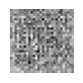

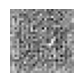

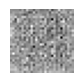

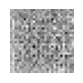

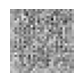

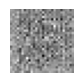

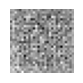

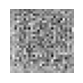

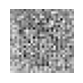

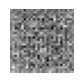

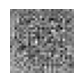

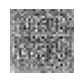

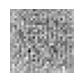

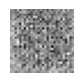

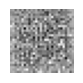

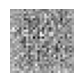

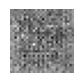

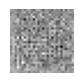

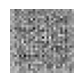

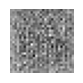

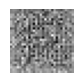

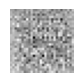

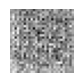

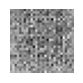

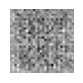

In [20]:
# size of the latent space
latent_dim = 100
# define the discriminator model
model = generator(latent_dim)
# generate samples
n_samples = 25
x, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
    # define subplot
    plt.subplot(5, 5, 1 + i)
    # turn off axis labels
    plt.axis('off')
    # plot single image
    plt.imshow(x[i, :, :, 0], cmap='gray_r')
    # show the figure
    plt.show()
